# Run validation tests of HippoUnit on the Tzilivaki et al. 2019 model of hippocampal basket cell

The purpose of this notebook is to show how to run the new basket cell validation tests of HippoUnit (https://github.com/sasaray/hippounit/tree/New_tests_for_other_cell_types) on the Tzilivaki et al. 2019 basket cell model (ModelDB accession number: 237595).

The tests shall take as input a standalone version of the model (a hoc file) that should not display any GUI, or contain any built in simulations and run-time modifications.
__In this notebook the version of the model is tested that uses the Somogyi_4 morphology
The hoc file that is used in this notebook is available here:
https://github.com/sasaray/HippoUnit_demo/blob/New_tests_for_other_cell_types/published_models/TzilivakiEtal_FSBCs_model/Multicompartmental_Biophysical_models/experiment/main_model_Somogyi_4.hoc

Target experimental data that are used by the validation tests in this notebook are available here: 
https://github.com/sasaray/HippoUnit_demo/tree/New_tests_for_other_cell_types/target_features


In [1]:
from __future__ import print_function

%matplotlib inline

from hippounit.utils import ModelLoader
from hippounit import tests

from json2html import *
import pkg_resources
import json
import collections
import numpy
import IPython

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# Somogyi_4 morphology

## Instantiating the model

The ModelLoader class of HippoUnit is instantiated and the model, and simulation related parameters are set.

In [2]:
# path to mod files
mod_files_path = "../published_models/TzilivakiEtal_FSBCs_model/Multicompartmental_Biophysical_models/mechanism/"

#all the outputs will be saved here. It will be an argument to the test.
base_directory = '../published_models_validation_results/'

#Load cell model
model = ModelLoader(mod_files_path = mod_files_path )

# outputs will be saved in subfolders named like this:
model.name="Tzilivaki_2019_Somogyi_4_morph"

# path to hoc file
# the model must not display any GUI!!
model.hocpath = "../published_models/TzilivakiEtal_FSBCs_model/Multicompartmental_Biophysical_models/experiment/main_model_Somogyi_4.hoc"

# If the hoc file doesn't contain a template, this must be None (the default value is None)
model.template_name = None
#Template is not loaded directly by HippoUnit, because "current_balanceFS(-68)" has to be called after initializing the template 

# model.SomaSecList_name should be None, if there is no Section List in the model for the soma, or if the name of the soma section is given by setting model.soma (the default value is None)
model.SomaSecList_name = None
# if the soma is not in a section list or to use a specific somatic section, add its name here:
model.soma = 'FScell[0].soma[0]'

# For Back-propagating AP Test a section list containing the trunk sections is needed
# model.TrunkSecList_name = 'trunk'
model.BasalSecList_name = 'FScell[0].basal_prox'
model.AxonSecList_name = 'FScell[0].axonal'

#These will be argument to those tests, where dendritic locatins are selected according to distances.
# If not set, the end (1 point) of the above given soma section will be used as reference point for distance determination of apical dendrites,
#The beginning (0 point) of it for basal dendrites and axons

trunk_origin = ['FScell[0].soma[0]', 1] 
basal_origin = ['FScell[0].soma[0]', 1]
axon_origin = ['FScell[0].soma[0]', 1]

# It is important to set the v_init and the celsius parameters of the simulations here,
# as if they are only set in the model's files, they will be overwritten with the default values of the ModelLoader class.
# default values: v_init = -70, celsius = 34 
model.v_init = -68
model.dt = 0.1



## Instantiating and running the tests of HippoUnit on the model

At the end of each test, the user is provided with a textual summary of the score and the path to related output files generated by the tests.

### Somatic Features Test 

It evaluates the model against various eFEL (https://github.com/BlueBrain/eFEL) features under somatic current injection of varying amplitudes. The experimental dataset used for validation is obtained from patch clamp recordings in rats by Judit Makara.

In [3]:
# Load target data
with open('../target_features/mouse_CA1_BC_PV_r190531-02_valid_data_jav.json') as f:
    observation = json.load(f, object_pairs_hook=collections.OrderedDict)

- running amplitude: -0.126 on model: Tzilivaki_2019_Somogyi_4_morph at: FScell[0].soma[0](0.5)
- running amplitude: -0.14 on model: Tzilivaki_2019_Somogyi_4_morph at: FScell[0].soma[0](0.5)
- running amplitude: -0.084 on model: Tzilivaki_2019_Somogyi_4_morph at: FScell[0].soma[0](0.5)
- running amplitude: -0.07 on model: Tzilivaki_2019_Somogyi_4_morph at: FScell[0].soma[0](0.5)
- running amplitude: -0.056 on model: Tzilivaki_2019_Somogyi_4_morph at: FScell[0].soma[0](0.5)
- running amplitude: -0.028 on model: Tzilivaki_2019_Somogyi_4_morph at: FScell[0].soma[0](0.5)
- running amplitude: -0.112 on model: Tzilivaki_2019_Somogyi_4_morph at: FScell[0].soma[0](0.5)
- running amplitude: -0.042 on model: Tzilivaki_2019_Somogyi_4_morph at: FScell[0].soma[0](0.5)
- running amplitude: -0.014 on model: Tzilivaki_2019_Somogyi_4_morph at: FScell[0].soma[0](0.5)
- running amplitude: -0.098 on model: Tzilivaki_2019_Somogyi_4_morph at: FScell[0].soma[0](0.5)
- running amplitude: 0.014 on model: Tzili

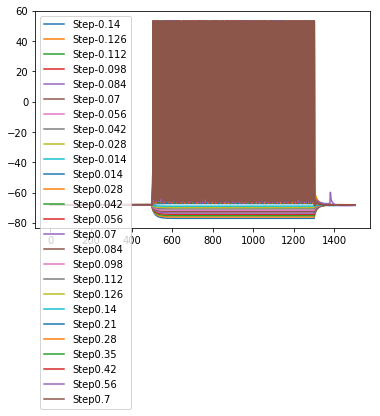

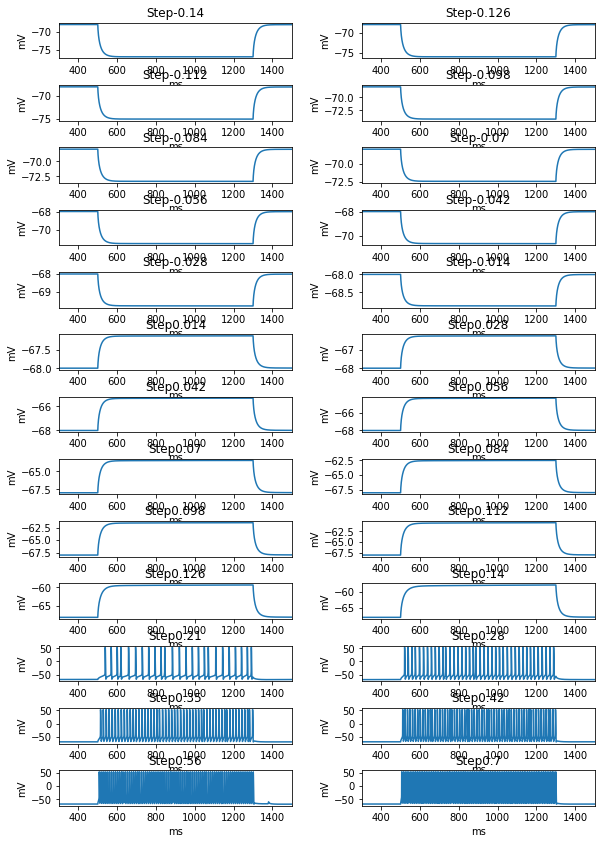

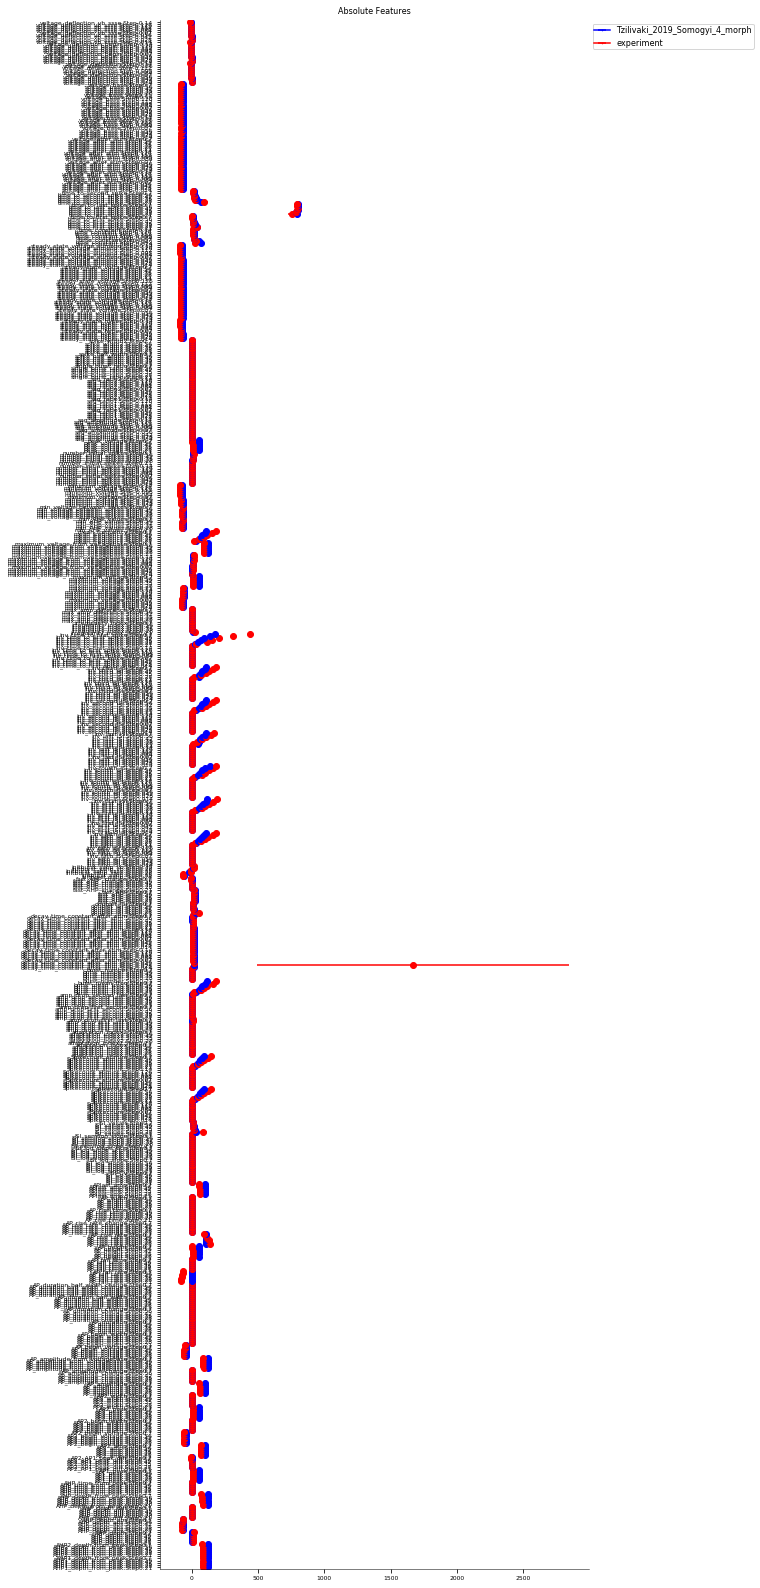

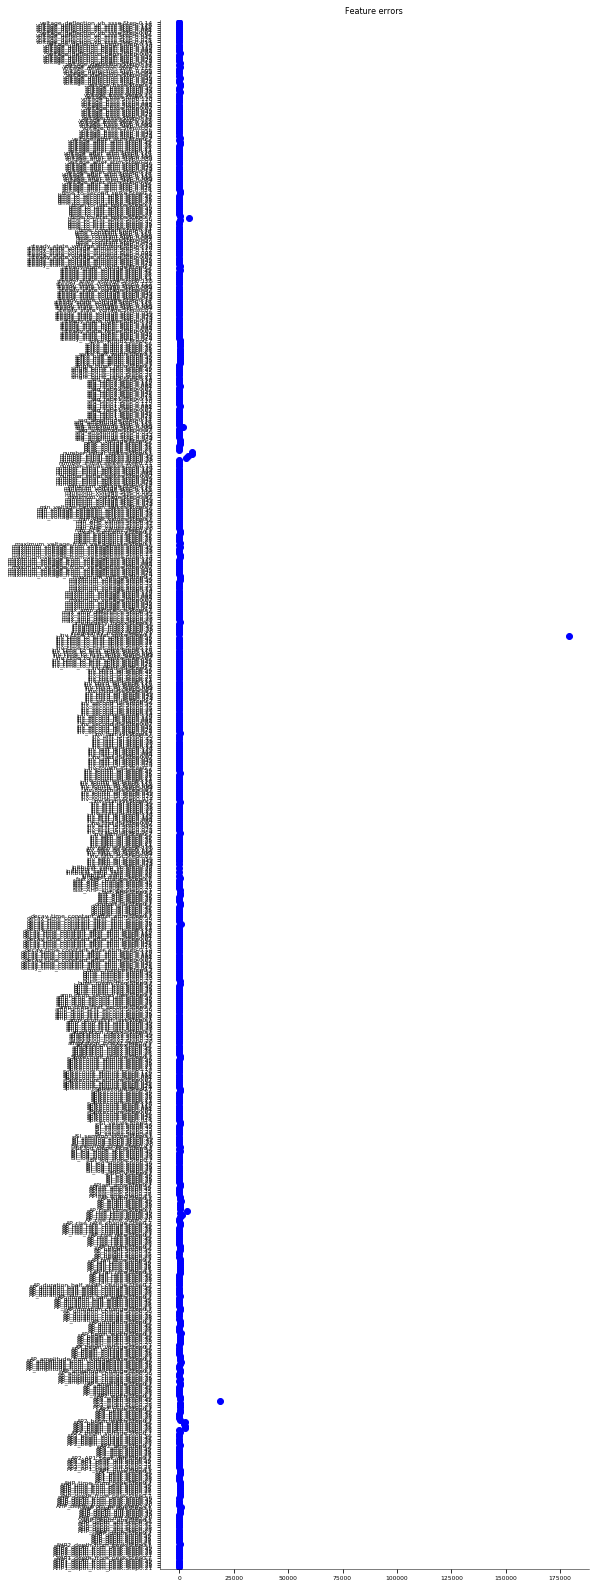

In [4]:
# Load stimuli file
stim_file = pkg_resources.resource_filename("hippounit", "tests/stimuli/somafeat_stim/stim_mouse_CA1_BC_PV_r190531-02_valid_data_jav.json")
with open(stim_file, 'r') as f:
    config = json.load(f, object_pairs_hook=collections.OrderedDict)
    
# Instantiate test class   
test = tests.SomaticFeaturesTest(observation=observation, config=config, force_run=False, show_plot=True, save_all = True, base_directory=base_directory)

# test.specify_data_set is added to the name of the subdirectory (somaticfeat), so test runs using different data sets can be saved into different directories
test.specify_data_set = 'AGulyas_data'

# Number of parallel processes
test.npool = 10

try:
    #Run the test 
    score = test.judge(model)
    #Summarize and print the score achieved by the model on the test using SciUnit's summarize function
    score.summarize()
except Exception as e:
    print('Model: ' + model.name + ' could not be run')
    print(e)
    pass

### Back-Propagating AP Test

The Back-Propagating AP Test evaluates the efficacy of back-propagating action potentials on the apical and basal dendrites in locations of different distances from the soma. The amplitude, the rise slope and the half-duration of the first and last backpropagating-AP of a train elicitied by a 1000 ms long 1 nA current input to the soma is examined. These extracted features are compared to experimental data from Hu et al. 2010 (https://doi.org/10.1126/science.1177876).

In [5]:
# Load target data
with open('../target_features/feat_BC_bAP_test.json') as f:
    observation = json.load(f, object_pairs_hook=collections.OrderedDict)

IPython.display.HTML(json2html.convert(json = observation))

Basal dendritic locations to be tested (with their actual distances): OrderedDict([(('FScell[0].dend[6]', 0.8999999999999999), 34.696354433343856), (('FScell[0].dend[161]', 0.5), 27.666560894297323), (('FScell[0].dend[126]', 0.7), 30.844479777431797), (('FScell[0].dend[161]', 0.8999999999999999), 49.799809609735185), (('FScell[0].dend[179]', 0.5), 59.66279120981372), (('FScell[0].dend[127]', 0.1), 46.04357596464148), (('FScell[0].dend[127]', 0.30000000000000004), 50.00364281554785), (('FScell[0].dend[162]', 0.1), 61.87919126056572), (('FScell[0].dend[7]', 0.30000000000000004), 59.59248542479811), (('FScell[0].dend[126]', 0.5), 22.03177126959414), (('FScell[0].dend[40]', 0.1), 41.57018440529914), (('FScell[0].dend[6]', 0.5), 19.275752462968807), (('FScell[0].dend[40]', 0.5), 53.644902322745224), (('FScell[0].dend[126]', 0.8999999999999999), 39.657188285269456), (('FScell[0].dend[89]', 0.1), 14.357812440711227)])
- running amplitude: 1.0 on model: Tzilivaki_2019_Somogyi_4_morph at: FScel

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python2.7/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


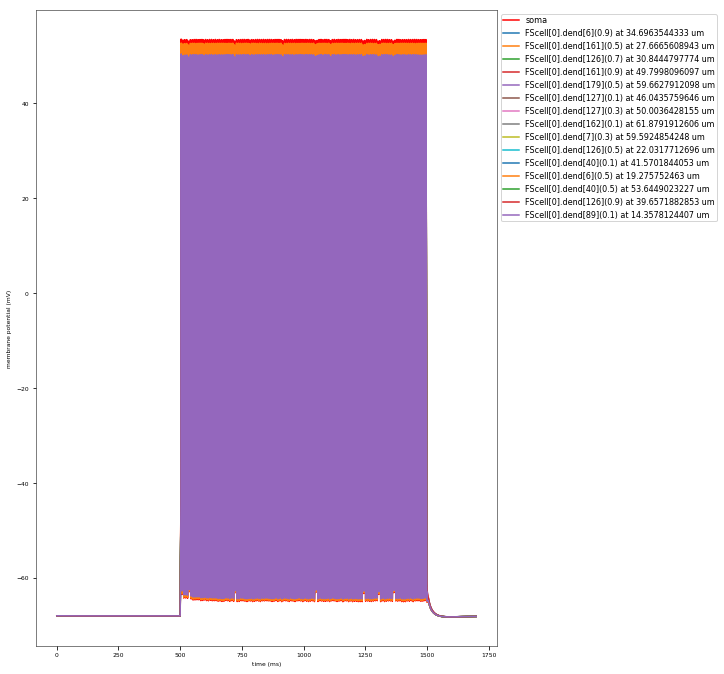

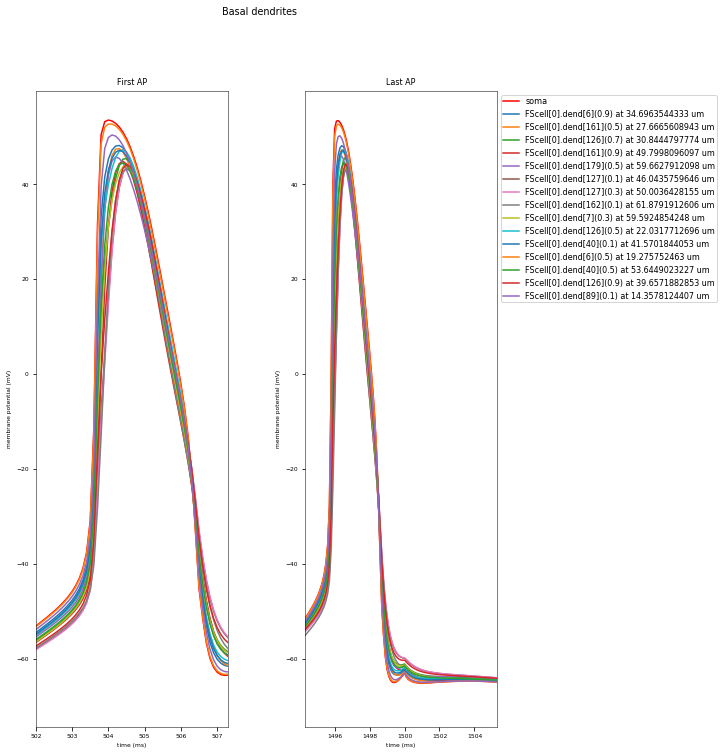

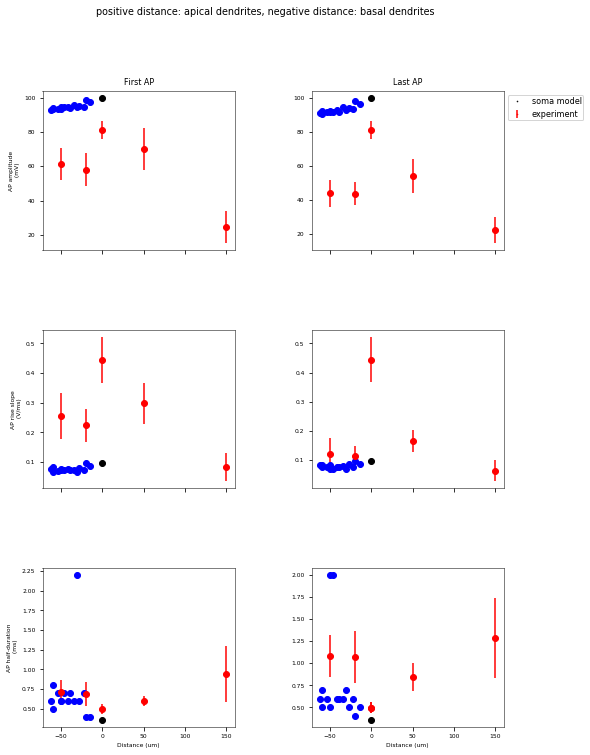

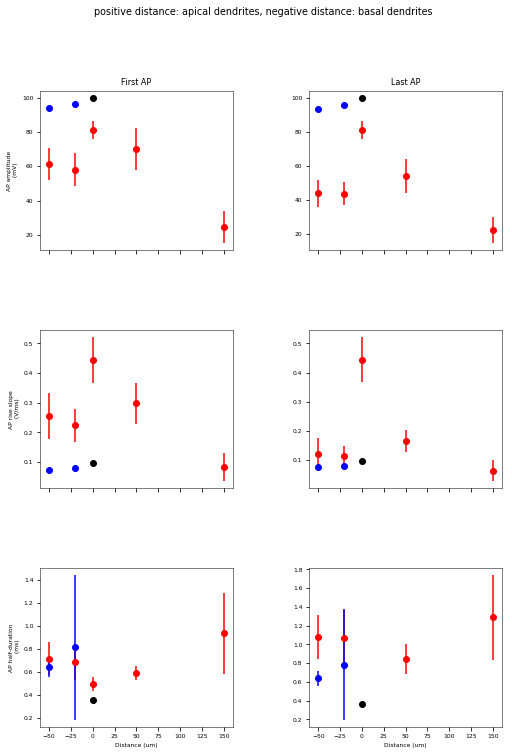

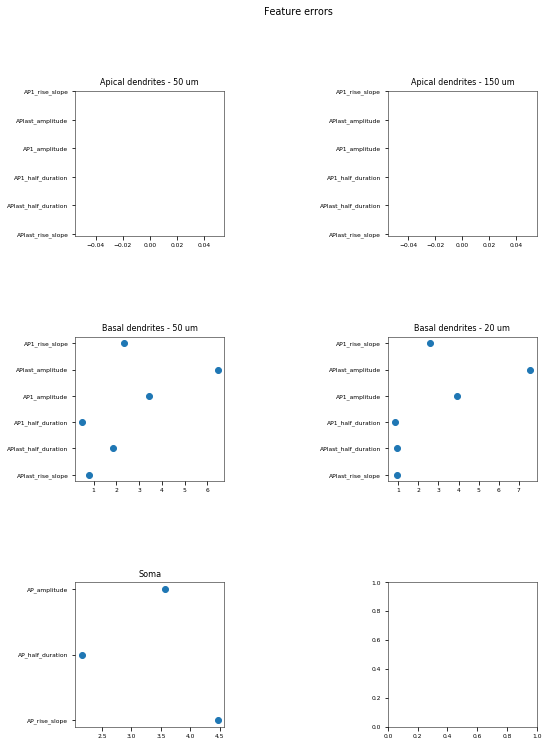

In [6]:
# Load stimuli file
stim_file = pkg_resources.resource_filename("hippounit", "tests/stimuli/bAP_BC_stim/stim_bAP_test_BC.json")

with open(stim_file, 'r') as f:
    config = json.load(f, object_pairs_hook=collections.OrderedDict)
    
#Number of apical and basal dendritic locations to be examined. Used in the argument of the test.
#If the model doesn't have one of these dendritic types, the value of this variable must be 0.
n_apical = 0
n_basal = 15

# Instantiate the test class
show_plot=True
force_run = False           
test = tests.BackpropagatingAPTest_BasketCell(config, observation, base_directory = base_directory, num_of_apical_dend_locations = n_apical, num_of_basal_dend_locations = n_basal, basal_origin = basal_origin, force_run=False, show_plot=show_plot)
   

# Number of parallel processes
test.npool = 10

try: 
    # Run the test
    score = test.judge(model)
    #Summarize and print the score achieved by the model on the test using SciUnit's summarize function
    score.summarize()
except Exception as e:
    print('Model: ' + model.name + ' could not be run')
    print(e)
    pass 

### AP Propagation Axon Test

The efficacy of the propagation of action potentials on axonal locations of different distances from the soma is examined. The amplitude and the half-duration of the first and last AP of a train elicitied by a 1000 ms long 1 nA current input to the soma is examined. These extracted features are compared to experimental data from Hu et al. 2018 (https://doi.org/10.1016/j.neuron.2018.02.024).

In [7]:
# Load target data
with open('../target_features/BC_AP_prop_axon_test.json') as f:
    observation = json.load(f, object_pairs_hook=collections.OrderedDict)

IPython.display.HTML(json2html.convert(json = observation))

Axonal locations to be tested (with their actual distances): OrderedDict([(('FScell[0].axon[754]', 0.15000000000000002), 195.83645824971393), (('FScell[0].axon[691]', 0.15000000000000002), 189.90402779007184), (('FScell[0].axon[0]', 0.9499999999999998), 91.90873696526971), (('FScell[0].axon[389]', 0.05), 156.0910389849665), (('FScell[0].axon[4]', 0.25), 215.50223188306495), (('FScell[0].axon[878]', 0.7499999999999999), 196.31543782142882), (('FScell[0].axon[389]', 0.35), 162.6162974583465), (('FScell[0].axon[389]', 0.5499999999999999), 166.96646977393317), (('FScell[0].axon[878]', 0.5499999999999999), 176.31543782142882), (('FScell[0].axon[434]', 0.05), 183.59782244909354), (('FScell[0].axon[878]', 0.05), 126.3154378214288), (('FScell[0].axon[390]', 0.5499999999999999), 165.98883510746793), (('FScell[0].axon[384]', 0.15000000000000002), 129.5684475495868)])
- running amplitude: 1.0 on model: Tzilivaki_2019_Somogyi_4_morph at: FScell[0].soma[0](0.5)
The figures are saved in the director

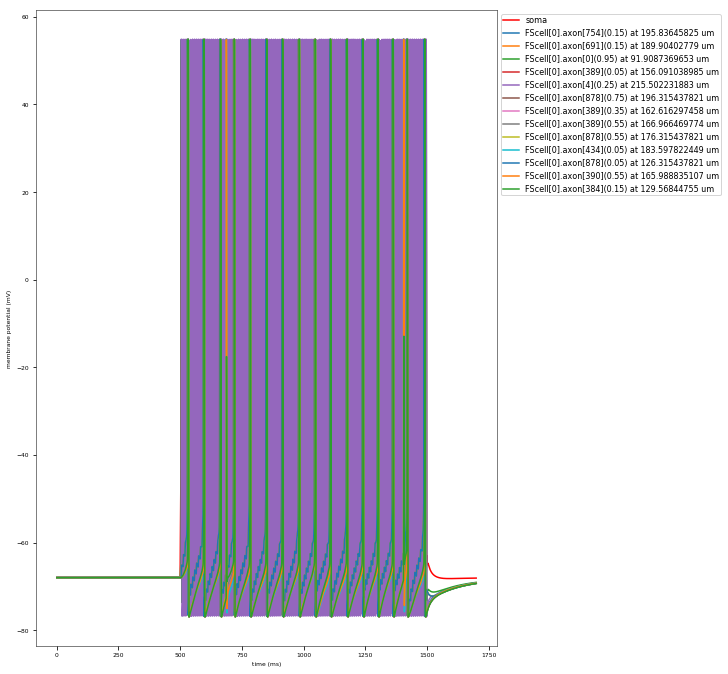

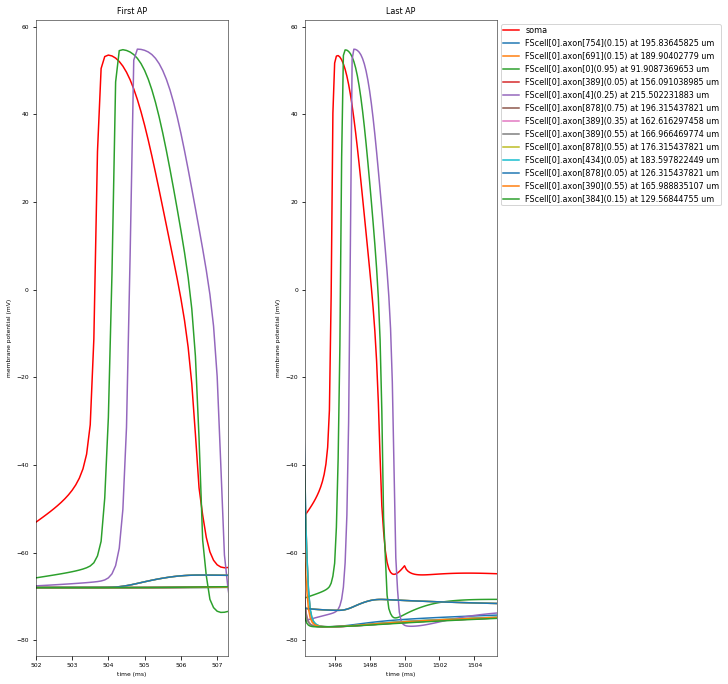

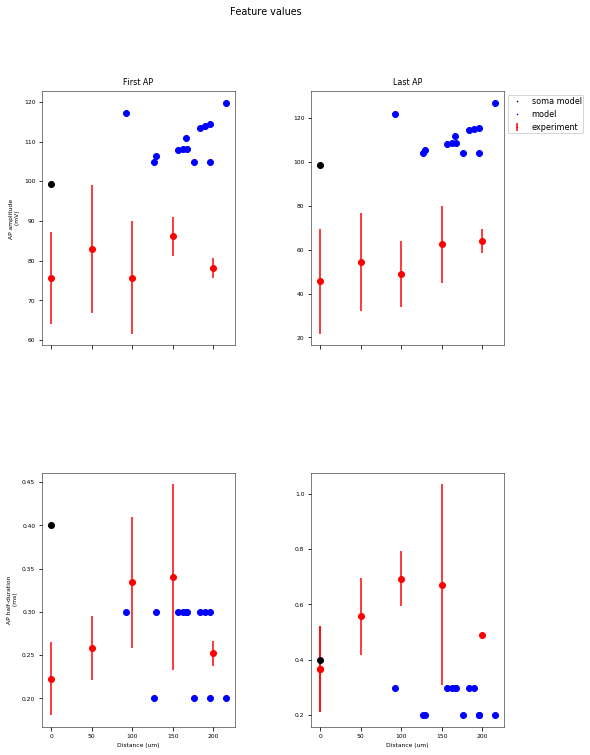

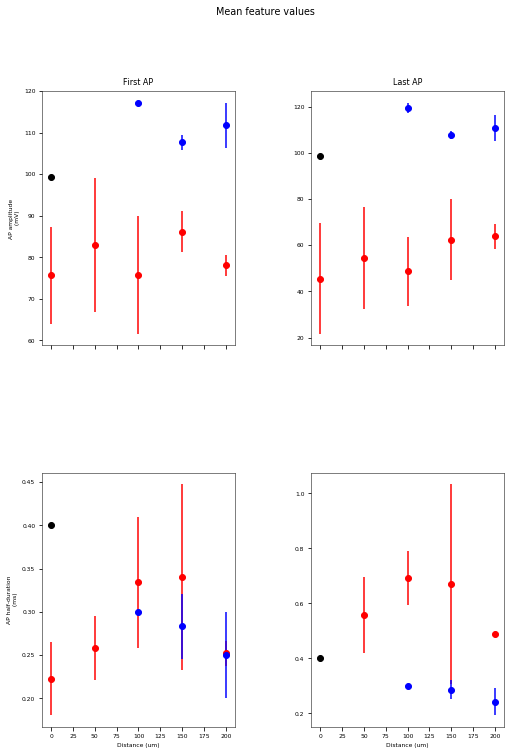

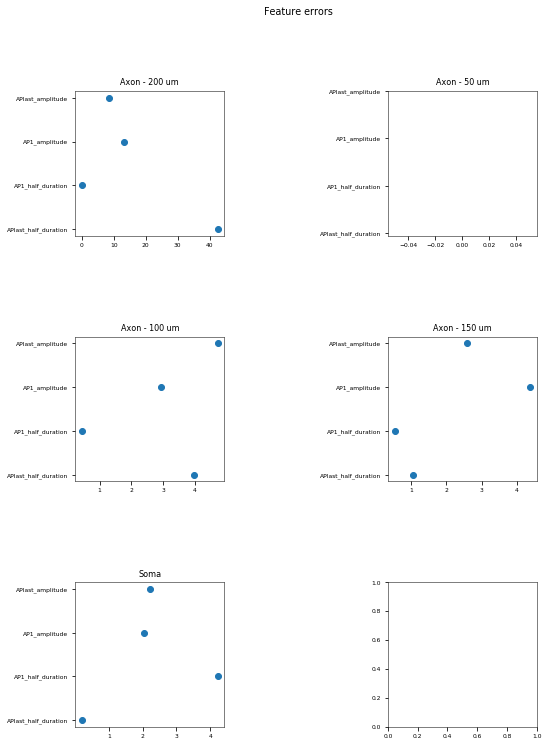

In [8]:
# Load stimuli file
stim_file = pkg_resources.resource_filename("hippounit", "tests/stimuli/AP_propagation_axon_BC_stim/stim_AP_prop_axon_test_BC.json")

with open(stim_file, 'r') as f:
    config = json.load(f, object_pairs_hook=collections.OrderedDict)

# Instantiate the test class
show_plot=True
force_run = False           
          
test = tests.APPropagationAxonTest_BasketCell(config, observation, base_directory = base_directory, num_of_axonal_locations = 15, axon_origin = axon_origin, force_run=False, show_plot=show_plot)
       

# Number of parallel processes
test.npool = 10

try: 
    # Run the test
    score = test.judge(model)
    #Summarize and print the score achieved by the model on the test using SciUnit's summarize function
    score.summarize()
except Exception as e:
    print('Model: ' + model.name + ' could not be run')
    print(e)
    pass 

In [9]:
%load_ext watermark

In [10]:
%watermark -v -m -p sciunit,efel,numpy,quantities,scipy,matplotlib,neuron

CPython 2.7.12
IPython 5.6.0

sciunit 0.2.0.2
efel 3.0.58
numpy 1.15.1
quantities 0.12.1
scipy 1.2.2
matplotlib 2.0.2
neuron unknown

compiler   : GCC 5.4.0 20160609
system     : Linux
release    : 4.15.0-74-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 56
interpreter: 64bit
